# Analysis of the beers prices dataset from Beerizer

In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df_beerizer = pd.read_csv('official_beerizer_dataset.csv')
print(df_beerizer.head())
print(df_beerizer.shape)

                    Beer_name    Price       Origin Rating  \
0                        Glas   € 5,50      England   3.83   
1            Meesterstuk 2025  € 13,99  Netherlands   4.11   
2            Meesterstuk 2025   € 6,99  Netherlands   4.11   
3  Do Not Eat the Yellow Snow   € 5,59  Netherlands   3.66   
4           Liqour 43 Infused   € 3,79  Netherlands      ?   

                  Brewery Percentage                      Beer_type  \
0   Azvex Brewing Company       5.2%  Pale Ale - New England / Hazy   
1                   Jopen     11.11%                 Stout - Pastry   
2                   Jopen     11.11%                 Stout - Pastry   
3  Uiltje Brewing Company       8.9%        IPA - Imperial / Double   
4   Guilty Monkey Brewery       7.6%              Belgian Quadrupel   

    Countenance Countenance_per_litre  
0           NaN                   NaN  
1  Bottle 750ml     € 18,65 per litre  
2  Bottle 750ml     € 18,65 per litre  
3  Bottle 750ml     € 18,65 per litre  


## Dataset preprocessing

In [64]:
#drop rows with missing values
df_beerizer = df_beerizer.dropna()
print(df_beerizer.shape)
#remove duplicates
df_beerizer = df_beerizer.drop_duplicates(keep='first')
print(df_beerizer.shape)

(28973, 9)
(28547, 9)


In [65]:
#correct price column
#remove € sign and convert to float
df_beerizer['Price'] = df_beerizer['Price'].str.replace('€', '', regex=False)
df_beerizer['Price'] = df_beerizer['Price'].str.replace('.', '', regex=False)
df_beerizer['Price'] = df_beerizer['Price'].str.replace(',', '.', regex=False)
df_beerizer['Price'] = df_beerizer['Price'].astype(float)
df_beerizer = df_beerizer.rename(columns={'Price': 'Price_euro'})
print(df_beerizer['Price_euro'].head())
print(df_beerizer['Price_euro'].mean())
# #drop 10 most expensive beers
# df_beerizer = df_beerizer.sort_values('Price_euro', ascending=False)
# df_beerizer = df_beerizer.iloc[10:] #maybe drop after, with price per litter
print(df_beerizer['Price_euro'].mean())
df_beerizer = df_beerizer.sort_index()

1    13.99
2     6.99
3     5.59
4     3.79
5     7.39
Name: Price_euro, dtype: float64
14.00505377097418
14.00505377097418


In [66]:
#convert Percentage column
df_beerizer['Percentage'] = df_beerizer['Percentage'].str.replace('%', '', regex=False)
df_beerizer['Percentage'] = df_beerizer['Percentage'].astype(float)
print(df_beerizer['Percentage'].head())


1    11.11
2    11.11
3     8.90
4     7.60
5    10.00
Name: Percentage, dtype: float64


In [67]:
df_beerizer['Countenance'].unique()

array(['Bottle 750ml', '330ml', 'Bottle 330ml', '10000ml', 'Can 440ml',
       '20000ml', 'Bottle 375ml', '12000ml', 'Bottle 500ml', '30000ml',
       '500ml', 'Can 500ml', 'Can 330ml', 'Can 470ml', '355ml', '473ml',
       '605ml', 'Bottle 341ml', 'Bottle 650ml', 'Bottle 250ml', '200ml',
       '6000ml', 'Bottle 1500ml', 'Can 473ml', 'Bottle 475ml', '5000ml',
       '10-pack', 'Bottle 370ml', '300ml', 'Bottle 568ml', '12-pack',
       '4-pack', '7-pack', 'Bottle 473ml', '20-pack', '6-pack', '24-pack',
       '700ml', 'Can 355ml', '578ml', '568ml', '350ml', 'Can 400ml',
       '8000ml', '3000ml', 'Bottle 550ml', 'Bottle 355ml', '85-pack',
       '255-pack', '550ml', '3100ml', '48-pack', '5-pack', '9-pack',
       '1125ml', '2970ml', '335ml', '248ml', 'Can 250ml', 'Can 568ml',
       'Can 375ml', 'Bottle 300ml', '4130ml', '4490ml', '475ml', '460ml',
       'Can 236ml', 'Bottle 660ml', '4730ml', '660ml', '400ml', '275ml',
       'Can 475ml', '187ml', '3-pack', '560ml', '2018ml', '40ml',


In [68]:
#add volume column
df_beerizer['Volume_ml'] = df_beerizer['Countenance'].copy()
df_beerizer['Volume_ml'] = df_beerizer['Volume_ml'].str.replace('ml', '').str.replace('Can ', '').str.replace('Bottle ', '')
#remove lines with non numeric values, loose pack sells, better as same beer appairs multiple times
df_beerizer = df_beerizer[df_beerizer['Volume_ml'].str.isnumeric()]
df_beerizer['Volume_ml'] = df_beerizer['Volume_ml'].astype(int)
df_beerizer['Volume_ml'].unique()
print(df_beerizer.shape)

(28158, 10)


In [69]:
df_beerizer['Price_per_litter'] = df_beerizer['Price_euro'] / (df_beerizer['Volume_ml'] / 1000)
print(df_beerizer.shape)
#drop beers with price per litter higher than a given value to have a more realistic dataset
price_threshold = 25
df_beerizer = df_beerizer[df_beerizer['Price_per_litter'] < price_threshold]

print(df_beerizer.shape)

df_beerizer.to_csv('cleaned_beerizer.csv', index=False)

(28158, 11)
(20191, 11)


## Market analysis

In [70]:
unique_types = df_beerizer['Beer_type'].unique()
#keep only numeral values
df_beerizer['Rating'] = pd.to_numeric(df_beerizer['Rating'], errors='coerce')
print(df_beerizer['Rating'].unique())
mean_grade_per_type = df_beerizer.groupby('Beer_type')['Rating'].mean(numeric_only=True)
# print(mean_grade_per_type)
std_grade_per_type = df_beerizer.groupby('Beer_type')['Rating'].std(numeric_only=True)

[4.11 3.66  nan 4.42 4.38 4.37 4.35 4.34 4.33 4.31 4.19 3.73 3.57 3.52
 3.38 3.3  3.94 3.4  3.58 4.   3.91 3.55 3.28 4.13 3.63 3.49 3.36 3.11
 2.88 3.79 3.69 3.61 3.59 3.51 3.43 3.34 3.5  3.47 3.46 3.44 3.25 4.08
 4.05 4.03 4.54 4.47 4.4  4.36 4.29 4.28 4.24 4.22 4.21 4.17 4.1  4.09
 4.07 3.97 4.39 4.3  4.26 4.2  4.27 4.23 4.01 3.65 4.02 3.93 3.82 3.99
 3.62 3.92 3.9  3.77 3.75 3.6  3.56 4.04 3.95 3.86 3.81 3.71 3.67 3.39
 3.29 3.83 2.79 3.7  3.53 2.9  3.24 3.68 3.64 3.48 3.41 3.37 3.74 3.27
 3.14 3.87 3.72 3.85 3.54 3.35 3.89 3.23 3.84 3.42 3.88 4.44 3.8  4.12
 4.06 3.98 3.33 4.25 3.45 3.78 4.18 3.32 3.21 3.01 2.91 3.05 3.18 2.37
 3.06 3.76 2.34 2.43 3.96 4.14 3.22 2.96 4.43 4.32 2.89 4.16 3.03 3.31
 2.83 2.84 3.17 3.13 3.09 4.15 3.07 3.26 3.15 3.04 2.75 3.2  4.58 3.08
 2.82 2.77 3.19 2.95 3.16 3.12 3.1  2.51 2.66 2.92 2.74 2.99 2.62 4.55
 2.87 2.97 4.48 2.98 2.94 2.93 4.41 2.85 2.53 2.39 2.63 2.86 2.57 3.02
 2.76 2.69 2.68 4.45 2.4  4.46 2.6  2.72 2.64 2.21 2.81 2.47 2.71 3.
 2.78 2.

In [71]:
mean_grade_per_type = mean_grade_per_type.sort_values(ascending=False)
std_grade_per_type = std_grade_per_type[mean_grade_per_type.index]
#remove nans
mean_grade_per_type = mean_grade_per_type.dropna()
std_grade_per_type = std_grade_per_type.dropna()
print(mean_grade_per_type)


Beer_type
Session IPA                             4.270000
Sour & Lambic                           4.210000
Hard Seltzer                            4.188000
Quadrupel                               4.120000
IPA - Triple New England / Hazy         4.111918
                                          ...   
Lager - Leichtbier                      3.021111
Historical Beer - Adambier              2.980000
Non-Alcoholic - Lager                   2.945753
Historical Beer - Berliner Braunbier    2.840000
Sorghum / Millet Beer                   2.390000
Name: Rating, Length: 283, dtype: float64


In [72]:
#save to csv
mean_grade_per_type.to_csv('mean_grade_per_type.csv')
#add std column
df = pd.DataFrame(mean_grade_per_type)
df['std'] = std_grade_per_type
df.to_csv('mean_grade_per_type_1.csv')

1        4.11
2        4.11
3        3.66
4         NaN
5         NaN
         ... 
29503    3.20
29504    3.43
29507    3.63
29508    3.85
29509    3.72
Name: Rating, Length: 20191, dtype: float64


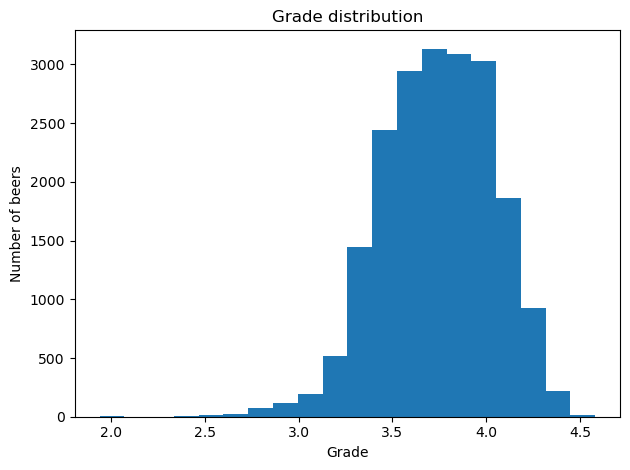

In [81]:
# grade distribution
print(df_beerizer['Rating'])
plt.figure()
plt.hist(df_beerizer['Rating'], bins=20)
plt.xlabel('Grade')
plt.ylabel('Number of beers')
plt.title('Grade distribution')
plt.tight_layout()

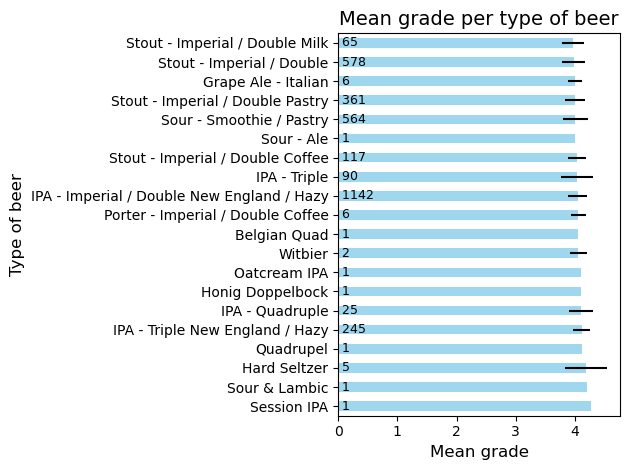

In [74]:
plt.figure()

# Plot the 20 beer types with best grades using a horizontal bar chart
mean_grade_per_type.head(20).plot(kind='barh', xerr=std_grade_per_type.head(20), color='skyblue', alpha=0.8)

# Add numbers of ratings next to the bars
for i, beer_type in enumerate(mean_grade_per_type.head(20).index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    plt.text(0, i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

# Adjust labels and title
plt.ylabel('Type of beer', fontsize=12)
plt.xlabel('Mean grade', fontsize=12)
plt.title('Mean grade per type of beer', fontsize=14)

# Tight layout to prevent overlap
plt.tight_layout()

plt.show()


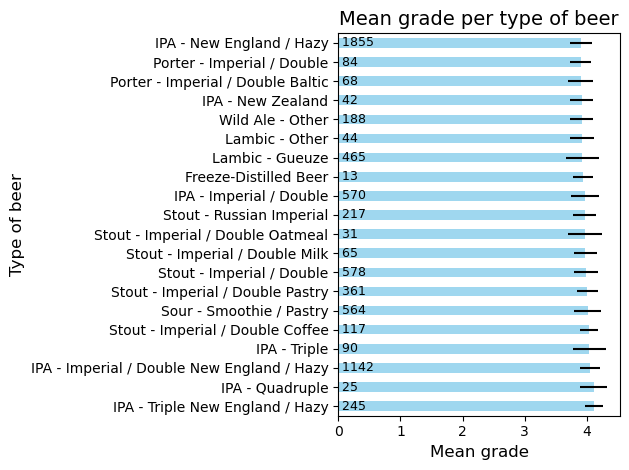

In [75]:
#remove types with less than 10 ratings
mean_grade_per_type = mean_grade_per_type[df_beerizer['Beer_type'].value_counts() > 10]
std_grade_per_type = std_grade_per_type[df_beerizer['Beer_type'].value_counts() > 10]
plt.figure()

# Plot the 20 beer types with best grades using a horizontal bar chart
mean_grade_per_type.head(20).plot(kind='barh', xerr=std_grade_per_type.head(20), color='skyblue', alpha=0.8)

# Add numbers of ratings next to the bars
for i, beer_type in enumerate(mean_grade_per_type.head(20).index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    plt.text(0, i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

# Adjust labels and title
plt.ylabel('Type of beer', fontsize=12)
plt.xlabel('Mean grade', fontsize=12)
plt.title('Mean grade per type of beer', fontsize=14)

# Tight layout to prevent overlap
plt.tight_layout()

plt.show()


In [76]:
mean_price_per_type = df_beerizer.groupby('Beer_type')['Price_per_litter'].mean()
std_price_per_type = df_beerizer.groupby('Beer_type')['Price_per_litter'].std()
print(mean_price_per_type)

Beer_type
Alcoholarm                6.818182
Alkoholmentes Italok     13.000000
Altbier - Sticke         19.060606
Altbier - Traditional    11.257313
American Pale Ale        10.696970
                           ...    
Wild ale                 17.333333
Winter Ale               12.458048
Winter Warmer            10.960921
Witbier                  10.935606
stout                    14.772727
Name: Price_per_litter, Length: 287, dtype: float64


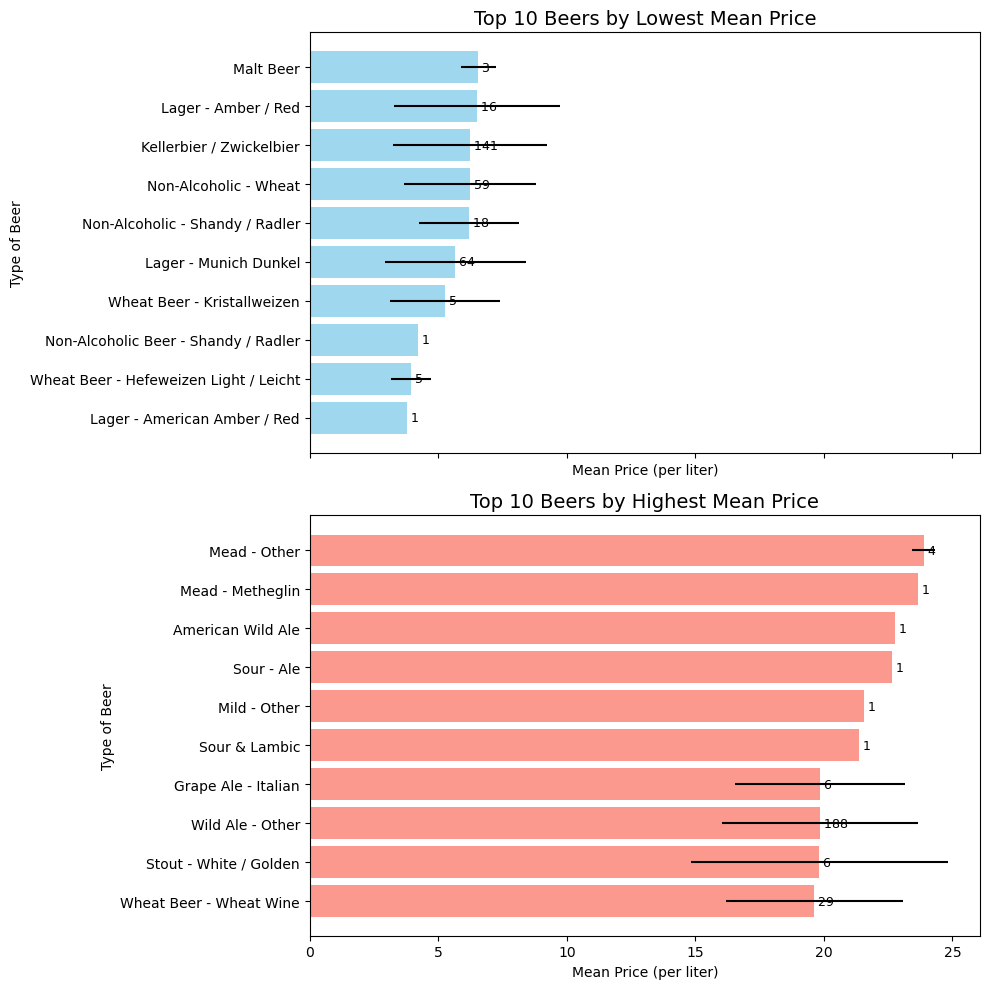

In [77]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Top 10 beers by lowest mean price
low_price = mean_price_per_type.sort_values().head(10)
low_std = std_price_per_type[low_price.index]

axes[0].barh(low_price.index, low_price, xerr=low_std, color='skyblue', alpha=0.8)
for i, beer_type in enumerate(low_price.index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    axes[0].text(low_price.iloc[i], i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

axes[0].set_title("Top 10 Beers by Lowest Mean Price", fontsize=14)
axes[0].set_xlabel("Mean Price (per liter)")
axes[0].set_ylabel("Type of Beer")

# Top 10 beers by highest mean price
high_price = mean_price_per_type.sort_values().tail(10)
high_std = std_price_per_type[high_price.index]

axes[1].barh(high_price.index, high_price, xerr=high_std, color='salmon', alpha=0.8)
for i, beer_type in enumerate(high_price.index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    axes[1].text(high_price.iloc[i], i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

axes[1].set_title("Top 10 Beers by Highest Mean Price", fontsize=14)
axes[1].set_xlabel("Mean Price (per liter)")
axes[1].set_ylabel("Type of Beer")

# Adjust layout to fit everything
plt.tight_layout()
plt.show()



### Average price and rating depending on the origin

In [78]:
origins = df_beerizer['Origin'].unique()
print(len(origins))
df_origins = pd.DataFrame(index=origins, columns=['Mean_grade', 'std_grade', 'Number_beers', 'Mean_price_euro_per_litter', 'std_price'])
df_origins.index.name = 'Origin'
df_origins['Mean_grade'] = df_beerizer.groupby('Origin')['Rating'].mean()
df_origins['std_grade'] = df_beerizer.groupby('Origin')['Rating'].std()
df_origins['Number_beers'] = df_beerizer['Origin'].value_counts()
df_origins['Mean_price_euro_per_litter'] = df_beerizer.groupby('Origin')['Price_per_litter'].mean()
df_origins['std_price'] = df_beerizer.groupby('Origin')['Price_per_litter'].std()
print(df_origins)
#save to csv
df_origins.to_csv('origin_stats.csv')

58
                        Mean_grade  std_grade  Number_beers  \
Origin                                                        
Netherlands               3.633316   0.276733          3283   
Canada                    4.092362   0.259534           387   
Czech Republic            3.741574   0.250308           198   
Germany                   3.542809   0.293121          2341   
Poland                    3.737946   0.247873          1005   
Spain                     3.875667   0.213731           663   
Belgium                   3.678690   0.268255          3903   
United States             3.966705   0.241428          2118   
Slovakia                  3.418095   0.221042            42   
Ireland                   3.773613   0.299489           192   
England                   3.803340   0.254025          1557   
Romania                   3.897871   0.198285           256   
Hungary                   3.668198   0.243805           290   
Estonia                   3.731416   0.272168       

### plotly simple example

In [79]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


df = df_beerizer.copy()

# Dropdown widgets for filtering
beer_type_dropdown = widgets.Dropdown(
    options=['All'] + list(df['Beer_type'].unique()),
    value='All',
    description='Beer Type:',
)
origin_dropdown = widgets.Dropdown(
    options=['All'] + list(df['Origin'].unique()),
    value='All',
    description='Origin:',
)

# Function to update the plot
def update_plot(beer_type, origin):
    filtered_df = df.copy()
    if beer_type != 'All':
        filtered_df = filtered_df[filtered_df['Beer_type'] == beer_type]
    if origin != 'All':
        filtered_df = filtered_df[filtered_df['Origin'] == origin]

    # Calculate price range
    if not filtered_df.empty:
        price_min = filtered_df['Price_per_litter'].min()
        price_max = filtered_df['Price_per_litter'].max()
        print(f"Price range: {price_min:.2f} - {price_max:.2f}")
    else:
        print("No data for the selected filters.")

    # Create an interactive plot with Plotly
    fig = px.box(
        filtered_df,
        x='Beer_type',
        y='Price_per_litter',
        color='Origin',
        title="Price Distribution by Beer Type and Origin",
    )
    fig.show()

# Link the widgets to the function
widgets.interactive(update_plot, beer_type=beer_type_dropdown, origin=origin_dropdown)

# Display the widgets
display(beer_type_dropdown, origin_dropdown)


Dropdown(description='Beer Type:', options=('All', 'Stout - Pastry', 'IPA - Imperial / Double', 'Belgian Quadr…

Dropdown(description='Origin:', options=('All', 'Netherlands', 'Canada', 'Czech Republic', 'Germany', 'Poland'…

### Unrepresented types, best market entry

could cross check with Matti data to see newcomers type

142


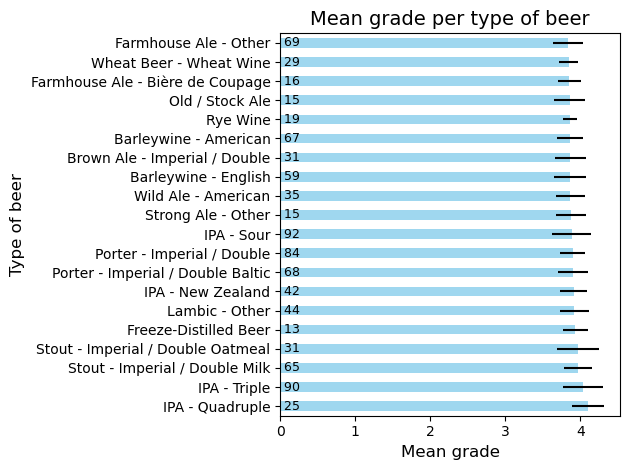

In [80]:
#best rated beers type with between 10 and 100 beers
mean_grade_per_type = mean_grade_per_type[df_beerizer['Beer_type'].value_counts() > 10]
mean_grade_per_type = mean_grade_per_type[df_beerizer['Beer_type'].value_counts() < 100]
std_grade_per_type = std_grade_per_type[df_beerizer['Beer_type'].value_counts() > 10]
std_grade_per_type = std_grade_per_type[df_beerizer['Beer_type'].value_counts() < 100]
plt.figure()

print(len(mean_grade_per_type))
# Plot the 20 beer types with best grades using a horizontal bar chart
mean_grade_per_type.head(20).plot(kind='barh', xerr=std_grade_per_type.head(20), color='skyblue', alpha=0.8)

# Add numbers of ratings next to the bars
for i, beer_type in enumerate(mean_grade_per_type.head(20).index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    plt.text(0, i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

# Adjust labels and title
plt.ylabel('Type of beer', fontsize=12)
plt.xlabel('Mean grade', fontsize=12)
plt.title('Mean grade per type of beer', fontsize=14)

# Tight layout to prevent overlap
plt.tight_layout()

plt.show()

### Cross check grades from other dataset

RateBeer and Untappd

In [103]:
from difflib import SequenceMatcher

def similar(a, b):
    """
    Calculate the similarity ratio between two strings.
    """
    return SequenceMatcher(None, a, b).ratio()

def match_and_combine_datasets(df1, df2):
    """
    Matches and combines two datasets based on beer names and brewery similarity.

    Parameters:
        df1 (pd.DataFrame): First dataframe with columns "Beer_name" and "Brewery".
        df2 (pd.DataFrame): Second dataframe with columns "beer_name" and "brewery_name".

    Returns:
        pd.DataFrame: A new dataframe containing matched beers with combined information.
    """
    # Rename columns to a common name for merging
    df1 = df1.rename(columns={"Beer_name": "common_beer_name", "Brewery": "common_brewery"})
    df2 = df2.rename(columns={"beer_name": "common_beer_name", "brewery_name": "common_brewery"})

    # Perform an initial match on beer names
    combined_df = pd.merge(df1, df2, on="common_beer_name", how="inner")
    

    # Filter rows where the brewery names are at least 50% similar
    combined_df = combined_df[combined_df.apply(
        lambda row: similar(row["common_brewery_x"], row["common_brewery_y"]) >= 0.5, axis=1
    )]

    # Optional: Rename the common columns back to preferred names
    combined_df = combined_df.rename(columns={"common_beer_name": "Beer_name", "common_brewery_x": "Brewery_df1", "common_brewery_y": "Brewery_df2"})

    return combined_df

# Example usage:
df1 = pd.read_csv("cleaned_beerizer.csv")
df2 = pd.read_csv("./RateBeer/beers.csv")
combined_dataset = match_and_combine_datasets(df1, df2)
combined_dataset.to_csv("matched_dataset.csv", index=False)
print(f"initial dataset length: {len(df1)} and matched dataset length: {len(combined_dataset)}")

initial dataset length: 20191 and matched dataset length: 391


BeerAdvocate and Untappd

In [106]:
from difflib import SequenceMatcher

def similar(a, b):
    """
    Calculate the similarity ratio between two strings.
    """
    return SequenceMatcher(None, a, b).ratio()

def match_and_combine_datasets(df1, df2):
    """
    Matches and combines two datasets based on beer names and brewery similarity.

    Parameters:
        df1 (pd.DataFrame): First dataframe with columns "Beer_name" and "Brewery".
        df2 (pd.DataFrame): Second dataframe with columns "beer_name" and "brewery_name".

    Returns:
        pd.DataFrame: A new dataframe containing matched beers with combined information.
    """
    # Rename columns to a common name for merging
    df1 = df1.rename(columns={"Beer_name": "common_beer_name", "Brewery": "common_brewery"})
    df2 = df2.rename(columns={"beer_name": "common_beer_name", "brewery_name": "common_brewery"})

    # Perform an initial match on beer names
    combined_df = pd.merge(df1, df2, on="common_beer_name", how="inner")
    

    # Filter rows where the brewery names are at least 50% similar
    combined_df = combined_df[combined_df.apply(
        lambda row: similar(row["common_brewery_x"], row["common_brewery_y"]) >= 0.9, axis=1
    )]

    # Optional: Rename the common columns back to preferred names
    combined_df = combined_df.rename(columns={"common_beer_name": "Beer_name", "common_brewery_x": "Brewery_df1", "common_brewery_y": "Brewery_df2"})

    return combined_df

# Example usage:
df1 = pd.read_csv("cleaned_beerizer.csv")
df2 = pd.read_csv("./BeerAdvocate/beers.csv")
combined_dataset = match_and_combine_datasets(df1, df2)
combined_dataset.to_csv("matched_dataset_BA.csv", index=False)
print(f"initial dataset length: {len(df1)} and matched dataset length: {len(combined_dataset)}")

initial dataset length: 20191 and matched dataset length: 672


### Same analysis ? Enough data ?

## Also for new beers from Matti ?